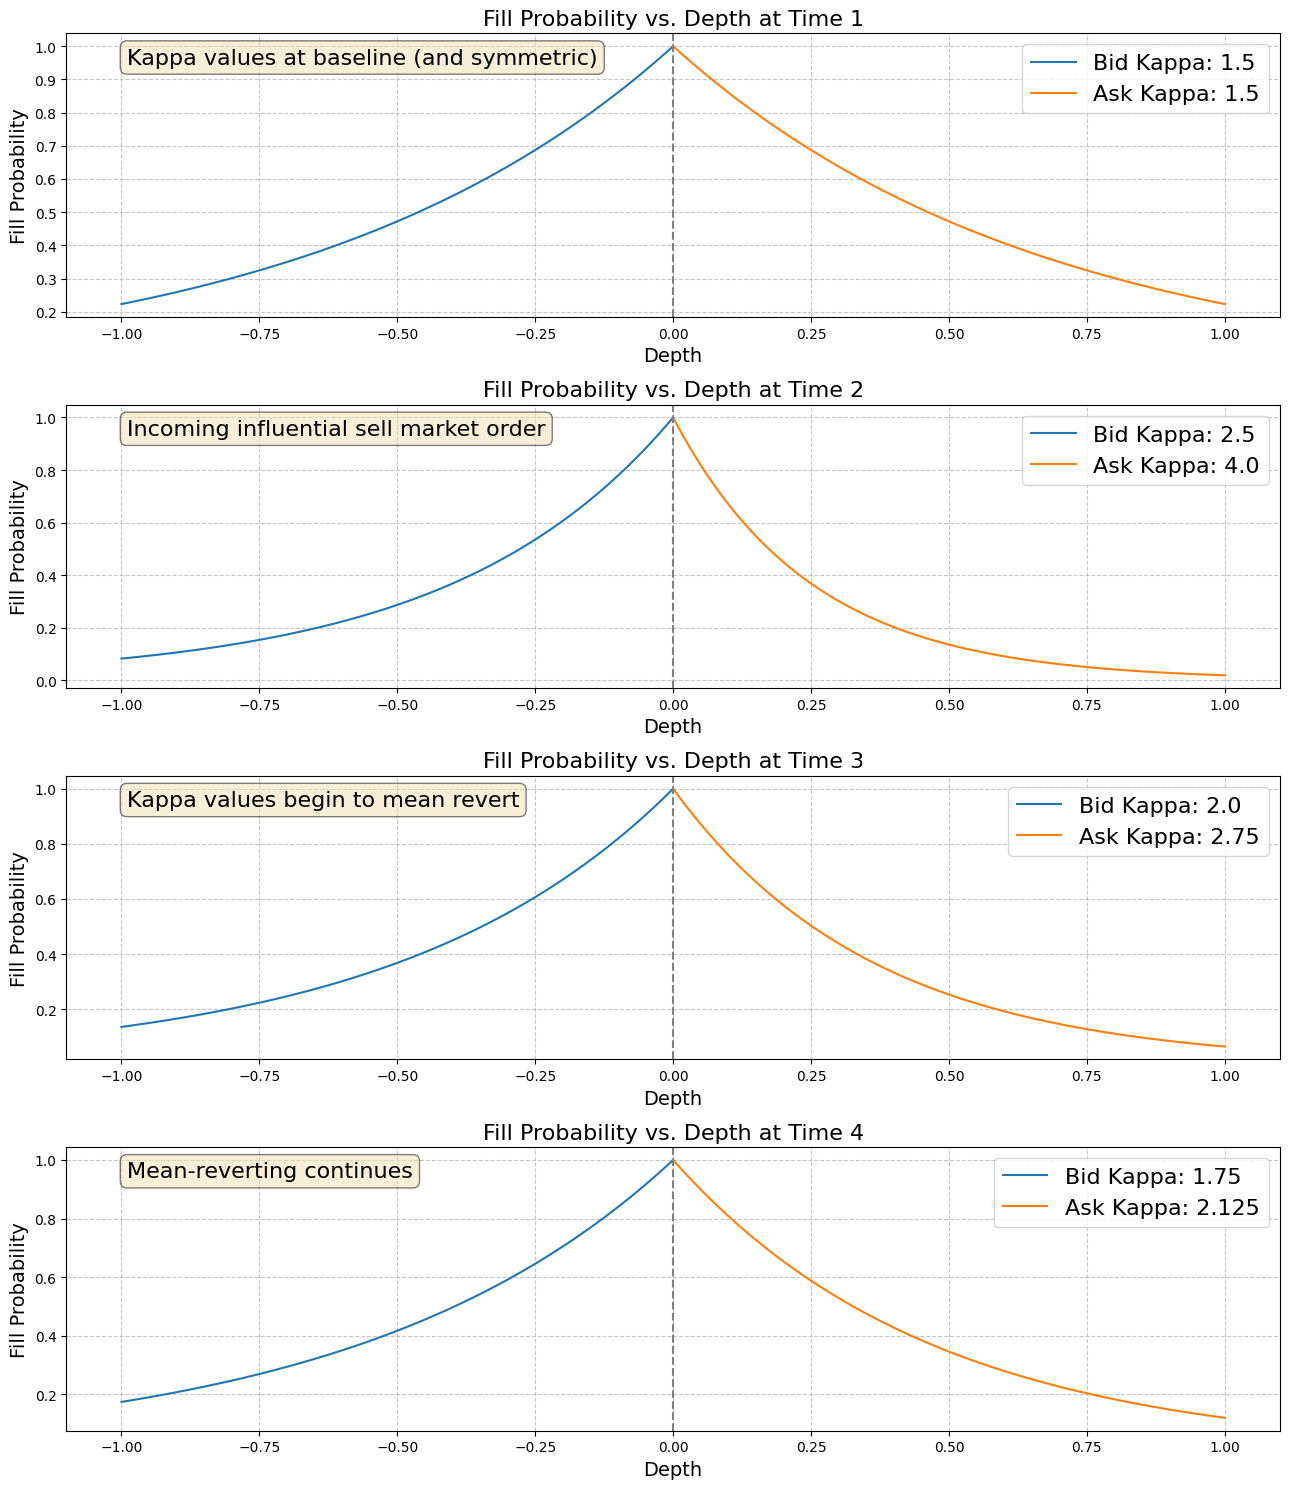

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Plotting an example of how the fill probability could as kappa changes (due to jumps from influential market orders)
# The fill probabiltiy is given as exp(-kappa*depth), where kappa is the fill exponent which jumps due to influential market orders

import matplotlib.gridspec as gridspec

# Example kappa values
kappa = np.array([[1.5, 1.5],    # Kappa values at baseline (and symmetric)
                  [2.5, 4],      # Incoming influential sell market order
                  [2, 2.75],     # Kappa values begin to mean revert
                  [1.75, 2.125]]) # Mean-reverting continues

# Comments associated with each kappa value
comments = ["Kappa values at baseline (and symmetric)",
            "Incoming influential sell market order",
            "Kappa values begin to mean revert",
            "Mean-reverting continues"]

# Depths
depths_bid = np.linspace(-1, 0, 100)  # values from -1 to 0
depths_ask = np.linspace(0, 1, 100)   # values from 0 to 1


# Set up a figure with multiple subplots
fig = plt.figure(figsize=(13, 15))
gs = gridspec.GridSpec(len(kappa), 1)

for i, (bid_kappa, ask_kappa) in enumerate(kappa):
    bid_fill_prob = np.exp(depths_bid * bid_kappa)
    ask_fill_prob = np.exp(-depths_ask * ask_kappa)

    ax = fig.add_subplot(gs[i])
    ax.plot(depths_bid, bid_fill_prob, label=f'Bid Kappa: {bid_kappa}')
    ax.plot(depths_ask, ask_fill_prob, label=f'Ask Kappa: {ask_kappa}')

    # Increase fontsize for x and y axis labels
    ax.set_xlabel('Depth', fontsize=14)
    ax.set_ylabel('Fill Probability', fontsize=14)

    # Increase fontsize for the title
    ax.set_title(f'Fill Probability vs. Depth at Time {i+1}', fontsize=16)

    # Increase fontsize for the legend
    ax.legend(fontsize=16)

    # Add gridlines and y-axis at x=0
    ax.axvline(x=0, color='gray', linestyle='--')
    ax.grid(True, which='both', linestyle='--', alpha=0.7)

    # Add comment as text to the graph with increased fontsize
    ax.text(0.05, 0.95, comments[i], transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout to ensure that text does not overlap
fig.tight_layout()

# Save the figure with all subplots to a single PNG file
fig.savefig('combined_plots.png')



